In [41]:
#import the ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

In [42]:
#image Data Agumentation
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
train_datagen = ImageDataGene

In [43]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [44]:
import os
import cv2
import numpy as np

In [45]:
datapath =r"C:\Users\Dell\Desktop\radiology\train"

In [46]:
#Loading our data and performing data agumentation
x_train = test_datagen.flow_from_directory(r"C:\Users\Dell\Desktop\radiology\train",target_size=(64, 64),batch_size=5,color_mode='grayscale',class_mode='categorical')

Found 594 images belonging to 6 classes.


In [47]:
datapath =r"C:\Users\Dell\Desktop\radiology\test"

In [48]:
x_test = test_datagen.flow_from_directory(r"C:\Users\Dell\Desktop\radiology\test",target_size=(64, 64),batch_size=5,color_mode='grayscale',class_mode='categorical')

Found 30 images belonging to 6 classes.


In [49]:
#importing Necessary Libraries
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [50]:
#Initializing the model
model=Sequential()

In [51]:
#First convolution Layer and pooling
model.add(Conv2D(32,(3,3),input_shape=(64, 64, 1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [52]:
#Second convolution Layer and pooling
model.add(Conv2D(32,(3, 3),activation='relu'))
#input_shape is going to be the pooled feature mapsfrom the previous convolution layer
model.add(MaxPooling2D(pool_size=(2, 2)))

In [53]:
#Flattening the layers
model.add(Flatten())

In [54]:
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=6,activation='softmax'))

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [56]:
#compiling the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [57]:
#Fitting the model
model.fit_generator(
    generator=x_train,steps_per_epoch = len(x_train),
    epochs=20, validation_data=x_test,validation_steps = len(x_test))

Epoch 1/20


C:\Users\Dell\AppData\Local\Temp\ipykernel_11256\197708238.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


119/119 [==============================] - 4s 23ms/step - loss: 1.3687 - accuracy: 0.4596 - val_loss: 0.7462 - val_accuracy: 0.8000
Epoch 2/20
119/119 [==============================] - 3s 22ms/step - loss: 0.5288 - accuracy: 0.8199 - val_loss: 0.5674 - val_accuracy: 0.8000
Epoch 3/20
119/119 [==============================] - 3s 21ms/step - loss: 0.2812 - accuracy: 0.8990 - val_loss: 0.5679 - val_accuracy: 0.8333
Epoch 4/20
119/119 [==============================] - 2s 21ms/step - loss: 0.1245 - accuracy: 0.9680 - val_loss: 0.6717 - val_accuracy: 0.8667
Epoch 5/20
119/119 [==============================] - 3s 22ms/step - loss: 0.0348 - accuracy: 0.9933 - val_loss: 0.5370 - val_accuracy: 0.8667
Epoch 6/20
119/119 [==============================] - 3s 22ms/step - loss: 0.0208 - accuracy: 0.9966 - val_loss: 0.5995 - val_accuracy: 0.8667
Epoch 7/20
119/119 [==============================] - 3s 21ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.8117 - val_accuracy: 0.8333
Epoch 8/20

In [58]:
#Save the model
model.save('gesture.h5')

In [59]:
model_json = model.to_json()
with open("model-bw.json","w") as json_file:
    json_file.write(model_json)

In [60]:
#Predicting our results
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model("gesture.h5")
path = r"C:\Users\Dell\Desktop\radiology\test\1\1.jpg"

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


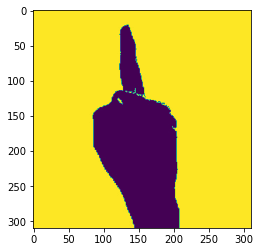

In [61]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgs = mpimg.imread(r"C:\Users\Dell\Desktop\radiology\test\1\1.jpg")
imgplot = plt.imshow(imgs)
plt.show()

In [62]:
img = image.load_img(r"C:\Users\Dell\Desktop\radiology\test\1\1.jpg",grayscale=True,
                    target_size= (64,64))
x = image.img_to_array(img)
x.shape

C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


(64, 64, 1)

In [63]:
type(x)

numpy.ndarray

In [181]:
x = np.expand_dims(x,axis = 0)

In [183]:
x.shape

(1, 1, 1, 64, 64, 1)

In [224]:
!pip install pred

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement pred (from versions: none)
ERROR: No matching distribution found for pred


In [284]:
index=['0','1','2','3','4','5']
result=str(1)
result

'1'

In [285]:
!pip install flask

Defaulting to user installation because normal site-packages is not writeable


In [286]:
from flask import Flask,render_template,request
import operator
import cv2
from tensorflow.keras.models import load_model
import os
from werkzeug.utils import secure_filename

In [ ]:
app = Flask(__name__,template_folder="templates")
model=load_model('gesture.h5')
print("Loaded model from disk")